# Self-Driving Car Engineer Nanodegree

## Deep Learning

## Project: Build a Traffic Sign Recognition Classifier

In this notebook, a template is provided for you to implement your functionality in stages which is required to successfully complete this project. If additional code is required that cannot be included in the notebook, be sure that the Python code is successfully imported and included in your submission, if necessary. Sections that begin with **'Implementation'** in the header indicate where you should begin your implementation for your project. Note that some sections of implementation are optional, and will be marked with **'Optional'** in the header.

In addition to implementing code, there will be questions that you must answer which relate to the project and your implementation. Each section where you will answer a question is preceded by a **'Question'** header. Carefully read each question and provide thorough answers in the following text boxes that begin with **'Answer:'**. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide.

>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

---
## Step 0: Load The Data

In [1]:
from sklearn.utils import shuffle
# Load pickled data
import pickle

# TODO: Fill this in based on where you saved the training and testing data
X_train, y_train, X_test, y_test = None, None, None, None
def load_data():
    training_file = './train.p'
    testing_file = './test.p'

    with open(training_file, mode='rb') as f:
        train = pickle.load(f)
    with open(testing_file, mode='rb') as f:
        test = pickle.load(f)

    global X_train, y_train, X_test, y_test
    X_train, y_train = train['features'], train['labels']
    X_test, y_test = test['features'], test['labels']

load_data()
print(len(X_train), len(X_test))

39209 12630


---

## Step 1: Dataset Summary & Exploration

The pickled data is a dictionary with 4 key/value pairs:

- `'features'` is a 4D array containing raw pixel data of the traffic sign images, (num examples, width, height, channels).
- `'labels'` is a 1D array containing the label/class id of the traffic sign. The file `signnames.csv` contains id -> name mappings for each id.
- `'sizes'` is a list containing tuples, (width, height) representing the the original width and height the image.
- `'coords'` is a list containing tuples, (x1, y1, x2, y2) representing coordinates of a bounding box around the sign in the image. **THESE COORDINATES ASSUME THE ORIGINAL IMAGE. THE PICKLED DATA CONTAINS RESIZED VERSIONS (32 by 32) OF THESE IMAGES**

Complete the basic data summary below.

In [2]:
### Replace each question mark with the appropriate value.

# TODO: Number of training examples
n_train = len(X_train)

# TODO: Number of testing examples.
n_test = len(X_test)

# TODO: What's the shape of an traffic sign image?
image_shape = X_train[0].shape

# TODO: How many unique classes/labels there are in the dataset.
n_classes = len(set(y_train))

print("Number of training examples =", n_train)
print("Number of testing examples =", n_test)
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)

Number of training examples = 39209
Number of testing examples = 12630
Image data shape = (32, 32, 3)
Number of classes = 43


Visualize the German Traffic Signs Dataset using the pickled file(s). This is open ended, suggestions include: plotting traffic sign images, plotting the count of each sign, etc.

The [Matplotlib](http://matplotlib.org/) [examples](http://matplotlib.org/examples/index.html) and [gallery](http://matplotlib.org/gallery.html) pages are a great resource for doing visualizations in Python.

**NOTE:** It's recommended you start with something simple first. If you wish to do more, come back to it after you've completed the rest of the sections.

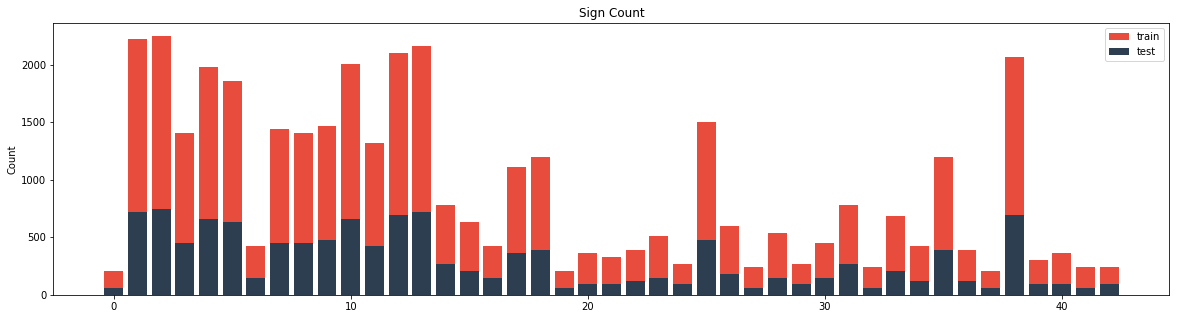

In [3]:
### Data exploration visualization goes here.
### Feel free to use as many code cells as needed.
import matplotlib.pyplot as plt
import numpy as np
# Visualizations will be shown in the notebook.
%matplotlib inline

def generate_graph(y_train, y_test, y_validation=None):
    bins_train = np.bincount(y_train)
    bins_test = np.bincount(y_test)

    plt.figure(figsize=(20, 5))
    plt.bar(range(n_classes), bins_train, label="train", color="#E74C3C", alpha=1.0)
    plt.bar(range(n_classes), bins_test, label="test", color="#2C3E50", alpha=1.0)
    if y_validation is not None:
        bins_validation = np.bincount(y_validation)
        plt.bar(range(n_classes), bins_validation, label="validation", color="#ECF0F1", alpha=0.8)

    plt.ylabel('Count')
    plt.title('Sign Count')
    plt.legend(loc="best")

generate_graph(y_train, y_test)

----

## Step 2: Design and Test a Model Architecture

Design and implement a deep learning model that learns to recognize traffic signs. Train and test your model on the [German Traffic Sign Dataset](http://benchmark.ini.rub.de/?section=gtsrb&subsection=dataset).

There are various aspects to consider when thinking about this problem:

- Neural network architecture
- Play around preprocessing techniques (normalization, rgb to grayscale, etc)
- Number of examples per label (some have more than others).
- Generate fake data.

Here is an example of a [published baseline model on this problem](http://yann.lecun.com/exdb/publis/pdf/sermanet-ijcnn-11.pdf). It's not required to be familiar with the approach used in the paper but, it's good practice to try to read papers like these.

**NOTE:** The LeNet-5 implementation shown in the [classroom](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) at the end of the CNN lesson is a solid starting point. You'll have to change the number of classes and possibly the preprocessing, but aside from that it's plug and play!

### Implementation

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project. Once you have completed your implementation and are satisfied with the results, be sure to thoroughly answer the questions that follow.

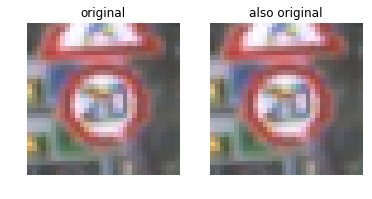

In [4]:
from collections import OrderedDict
### Preprocess the data here.
### Feel free to use as many code cells as needed.
def compare_images(images):
    img_count = len(images)
    fig, axs = plt.subplots(1,img_count, figsize=(3*img_count, 3))

    i=0
    for title, img in images:
        axs[i].axis('off')
        axs[i].imshow(img.squeeze(), cmap='gray')
        axs[i].set_title(title)
        i += 1
    
compare_images([('original', X_train[0]), ('also original', X_train[0])])

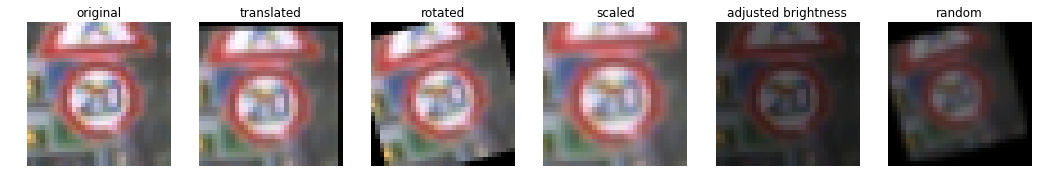

In [5]:
import cv2
# random_translate, random_scale, random_rotate, random_warp, and random_brightness
# gen_transformed_data(X_train,y_train,43,10,30,5,5,1)
# gen_transformed_data(X_train,y_train,N_classes,n_each,ang_range,shear_range,trans_range,randomize_Var):
ANG_RANGE = 15
SHEAR_RANGE = 5
TRANS_RANGE = 5

def randomize_translation(img):
    rows, cols, _ = img.shape
    tx = TRANS_RANGE*np.random.uniform()-TRANS_RANGE/2
    ty = TRANS_RANGE*np.random.uniform()-TRANS_RANGE/2
    
    M = np.float32([[1,0,tx],
                    [0,1,ty]])
    
    return cv2.warpAffine(img,M,(cols,rows))

def randomize_rotation(img):
    ang_rot = np.random.uniform(ANG_RANGE)-ANG_RANGE/2 # [-ANG_RANGE/2, ANG_RANGE/2]
    rows,cols,_ = img.shape    
    
    M = cv2.getRotationMatrix2D((cols/2,rows/2),ANG_RANGE,1)
    
    return cv2.warpAffine(img,M,(cols,rows))

def randomize_scale(img):
    rows,cols,_ = img.shape

    # transform limits
    tx = np.random.randint(-TRANS_RANGE,TRANS_RANGE)

    # starting locations ( just the corners)
    initial = np.float32([[0,0],
                          [rows,0],
                          [0,cols],
                          [rows,cols]])

    # final locations (corners + offsets)
    final = np.float32([[tx,tx],
                       [rows-tx,tx],
                       [tx,cols-tx],
                       [rows-tx,cols-tx]])

    M = cv2.getPerspectiveTransform(final,initial)
    
    return cv2.warpPerspective(img,M,(rows,cols))

def randomize_brightness(img):
    random_bright = .3+np.random.uniform()*0.7 #between 30 and 100%
    
    # Works better in HSV colorspace
    img_hsv = cv2.cvtColor(img,cv2.COLOR_RGB2HSV)
    img_hsv[:,:,2] = img_hsv[:,:,2]*random_bright
    
    return cv2.cvtColor(img_hsv,cv2.COLOR_HSV2RGB)

def randomize(img):
    return randomize_translation(randomize_rotation(randomize_scale(randomize_brightness(img))))

images = [
    ('original',            X_train[0]),
    ('translated',          randomize_translation(X_train[0])),
    ('rotated',             randomize_rotation(X_train[0])),
    ('scaled',              randomize_scale(X_train[0])),
    ('adjusted brightness', randomize_brightness(X_train[0])),
    ('random',              randomize(X_train[0])),
]

compare_images(images)

Booting up... (39209, 32, 32, 3) (39209,)
Images added:  22241 (61450, 32, 32, 3) (61450,)


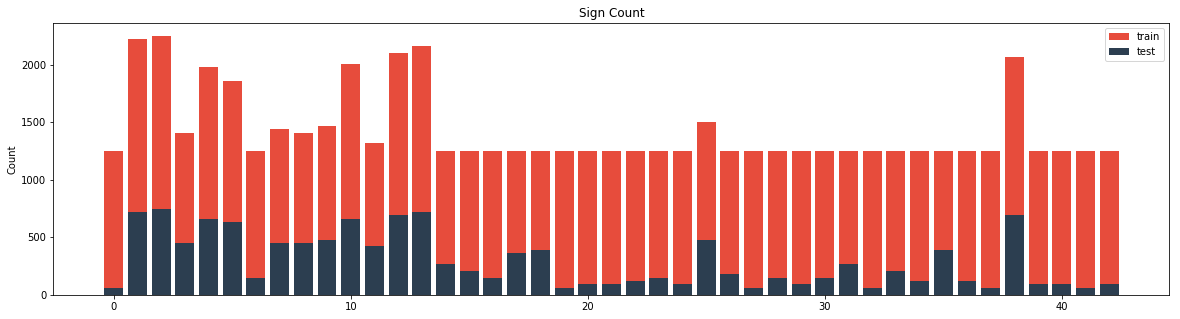

In [6]:
import random
import os.path as path

X_file = './X_train_augmented.p'
y_file = './y_train_augmented.p'

MIN_SAMPLES = 1250

def load_saved_data():
    global X_train, y_train
    print("Booting up...", X_train.shape, y_train.shape, flush=True)
    len_before = len(y_train)
    if not path.exists(X_file) or not path.exists(y_file):
        print("Files not found, generating images...", flush=True)
        for n in range(n_classes):
            indexes = np.where(y_train == n)[0]
            count = len(indexes)

            if count < MIN_SAMPLES:
                print("Generating data for class", n, flush=True)
                for i in range(MIN_SAMPLES - count):
                    X_train = np.concatenate((X_train, [randomize(X_train[random.choice(indexes)])]))
                    y_train = np.concatenate((y_train, [n]))

                    left = MIN_SAMPLES-count-i
                    if left % 100 == 0:
                        print(left, end='', flush=True)
                    elif left % 25 == 0:
                        print('|',end='', flush=True)

                print('', flush=True)

        print("Saving...", flush=True)
        with open(X_file, mode='wb') as f:
            pickle.dump(X_train, f)

        print("Saved X_file", flush=True)

        with open(y_file, mode='wb') as f:
            pickle.dump(y_train, f)
        print("Done Saving!", flush=True)

    with open(X_file, mode='rb') as f:
        X_train = pickle.load(f)

    with open(y_file, mode='rb') as f:
        y_train = pickle.load(f)

    print("Images added: ", len(y_train)-len_before, X_train.shape, y_train.shape)

load_saved_data()
generate_graph(y_train, y_test)

(43015, 32, 32, 3) (18435, 32, 32, 3) (12630, 32, 32, 3)
(43015, 32, 32, 1) (18435, 32, 32, 1) (12630, 32, 32, 1)


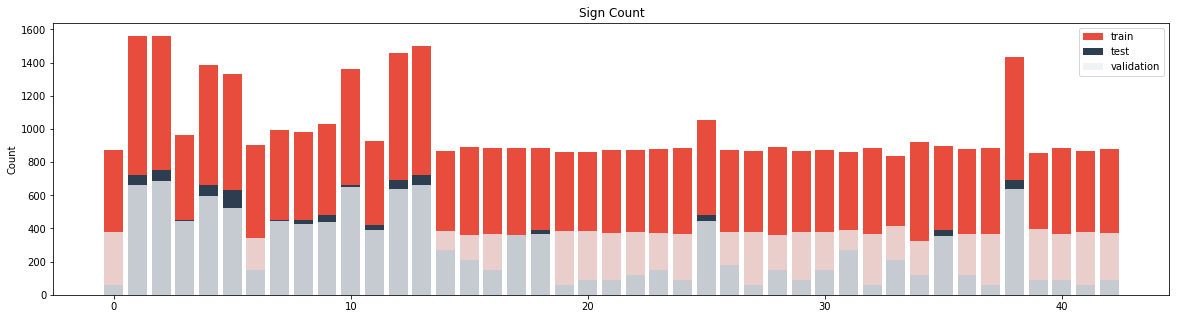

In [7]:
X_train, y_train = shuffle(X_train, y_train)
split = int(len(X_train) * 0.7)

X_validation, y_validation = X_train[split:], y_train[split:]
X_train, y_train = X_train[:split], y_train[:split]

with open('./all_test_data.p', mode='wb') as f:
    pickle.dump([X_train, X_validation, y_train, y_validation], f)

print (X_train.shape,X_validation.shape,X_test.shape)
def preprocess(images):
    if images.shape[3] == 1:
        return images
    gray = np.array([cv2.cvtColor(img, cv2.COLOR_RGB2YUV)[:,:,0] for img in images])
    normalized = np.expand_dims((2.*gray/255.)-1., axis=3)
    return normalized.astype(np.float32)

X_train = preprocess(X_train)
X_test = preprocess(X_test) 
X_validation = preprocess(X_validation)
print (X_train.shape,X_validation.shape,X_test.shape)
generate_graph(y_train, y_test, y_validation)

In [8]:
import tensorflow as tf
from tensorflow.contrib.layers import flatten

def LeMagoNet(x):    
    # Arguments used for tf.truncated_normal, randomly defines variables for the weights and biases for each layer
    mu = 0
    sigma = 0.1
    
    weights = {
        'conv1': tf.Variable(tf.truncated_normal([5, 5, 1, 6], mean = mu, stddev = sigma)),
        'conv2': tf.Variable(tf.truncated_normal([5, 5, 6, 16], mean = mu, stddev = sigma)),
        'conv3': tf.Variable(tf.truncated_normal([5, 5, 16, 400], mean = mu, stddev = sigma)),
        'logits': tf.Variable(tf.truncated_normal(shape=(800, 43), mean = mu, stddev = sigma))
    }
    
    biases = {
        'conv1': tf.Variable(tf.zeros(6)),
        'conv2': tf.Variable(tf.zeros(16)),
        'conv3': tf.Variable(tf.zeros(400)),
        'logits': tf.Variable(tf.zeros(43))
    }
    
    #LeNet
    # Layer 1: Convolutional. Input = 32x32x1. Output = 28x28x6.
    conv1 = tf.nn.conv2d(x, weights['conv1'], strides=[1, 1, 1, 1], padding='VALID')
    conv1 = conv1 + biases['conv1']
    # Activation.
    conv1 = tf.nn.relu(conv1)
    
    # Pooling. Input = 28x28x6. Output = 14x14x6.
    pool1 = tf.nn.max_pool(conv1, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='SAME')
    
    # Layer 2: Convolutional. Output = 10x10x16.
    conv2 = tf.nn.conv2d(pool1, weights['conv2'], strides=[1, 1, 1, 1], padding='VALID')
    conv2 = conv2 + biases['conv2']
    # Activation.
    conv2 = tf.nn.relu(conv2)
    
    # Pooling. Input = 10x10x16. Output = 5x5x16.
    pool2 = tf.nn.max_pool(conv2, ksize=[1,2,2,1], strides=[1,2,2,1], padding='VALID')
    
    #NEW:  Layer 3: Convolutional. Output = 400
    conv3 = tf.nn.conv2d(pool2, weights['conv3'], strides=[1, 1, 1, 1], padding='VALID')
    conv3 = conv3 + biases['conv3']
    #NEW:  Activation.
    conv3 = tf.nn.relu(conv3)
    
    # Flatten. Input = 5x5x16. Output = 400.
    fc_0_p1 = flatten(pool2)
    
    #NEW:  Flatten layer 2. Output = 400.
    fc_0_p2 = flatten(conv3)
    
    #NEW: Full fully connected layer.
    fc_0 = tf.concat_v2([fc_0_p1, fc_0_p2], 1)
    
    drop_0 = tf.nn.dropout(fc_0, keep_prob)
    
    # Layer 3: Fully Connected. Input = 800. Output = 43.
    logits = tf.add(tf.matmul(drop_0, weights['logits']), biases['logits'])
    return logits

In [9]:
#features and labels
x = tf.placeholder(tf.float32, (None, 32, 32, 1))
y = tf.placeholder(tf.int32, (None))
keep_prob = tf.placeholder(tf.float32)
one_hot_y = tf.one_hot(y, 43)

#training
rate = tf.placeholder(tf.float32)

logits = LeMagoNet(x)
cross_entropy = tf.nn.softmax_cross_entropy_with_logits(logits, one_hot_y)
loss_operation = tf.reduce_mean(cross_entropy)
optimizer = tf.train.AdamOptimizer(learning_rate = rate)
training_operation = optimizer.minimize(loss_operation)

#evaluation
correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(one_hot_y, 1))
accuracy_operation = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
saver = tf.train.Saver()

def evaluate(X_data, y_data):
    num_examples = len(X_data)
    total_accuracy = 0
    sess = tf.get_default_session()
    for offset in range(0, num_examples, BATCH_SIZE):
        batch_x, batch_y = X_data[offset:offset+BATCH_SIZE], y_data[offset:offset+BATCH_SIZE]
        accuracy = sess.run(accuracy_operation, feed_dict={x: batch_x, y: batch_y, keep_prob: 1.0})
        total_accuracy += (accuracy * len(batch_x))
    return total_accuracy / num_examples

In [10]:
EPOCHS = 100
BATCH_SIZE = 128

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    num_examples = len(X_train)
    
    print("Training...")
    print()
    for i in range(EPOCHS):
        X_train, y_train = shuffle(X_train, y_train)
        for offset in range(0, num_examples, BATCH_SIZE):
            end = offset + BATCH_SIZE
            batch_x, batch_y = X_train[offset:end], y_train[offset:end]
            sess.run(training_operation, feed_dict={x: batch_x, y: batch_y, keep_prob: 0.5, rate: 0.001})
            
        validation_accuracy = evaluate(X_validation, y_validation)
        print("EPOCH {}...   Validation Accuracy = {:.3f}".format(i+1, validation_accuracy*100))
        
    saver.save(sess, 'lenet')
    print("Model saved")

Training...

EPOCH 1...   Validation Accuracy = 77.667
EPOCH 2...   Validation Accuracy = 88.603
EPOCH 3...   Validation Accuracy = 91.836
EPOCH 4...   Validation Accuracy = 93.176
EPOCH 5...   Validation Accuracy = 94.402
EPOCH 6...   Validation Accuracy = 95.243
EPOCH 7...   Validation Accuracy = 95.910
EPOCH 8...   Validation Accuracy = 96.165
EPOCH 9...   Validation Accuracy = 96.751
EPOCH 10...   Validation Accuracy = 96.848
EPOCH 11...   Validation Accuracy = 97.082
EPOCH 12...   Validation Accuracy = 97.114
EPOCH 13...   Validation Accuracy = 96.713
EPOCH 14...   Validation Accuracy = 97.347
EPOCH 15...   Validation Accuracy = 97.478
EPOCH 16...   Validation Accuracy = 97.407
EPOCH 17...   Validation Accuracy = 97.521
EPOCH 18...   Validation Accuracy = 97.597
EPOCH 19...   Validation Accuracy = 97.928
EPOCH 20...   Validation Accuracy = 97.966
EPOCH 21...   Validation Accuracy = 97.971
EPOCH 22...   Validation Accuracy = 97.798
EPOCH 23...   Validation Accuracy = 98.031
EPOCH 2

In [11]:
with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('.'))

    test_accuracy = evaluate(X_test, y_test)
    print("Test Accuracy = {:.3f}".format(test_accuracy*100))

Test Accuracy = 95.550


### Question 1 

_Describe how you preprocessed the data. Why did you choose that technique?_

**Answer:**

1. Generate additional training data to ensure each class has over 1250 in data. This is done using the random_translate, random_scale, random_rotate, random_warp, and random_brightness functions.
2. Convert RGB to Grayscale images because the 3 color channels do not contain enough extra information to justify keeping them. Grayscale handles very well.
3. Normalize grayscale image pixel data using min-max scaling to a range of [-1,1]. This has mean of 0, which has proven useful.
4. Split training data (including additional augmented data) into training and validation set ... 80% training and 20% validation

### Question 2

_Describe how you set up the training, validation and testing data for your model. **Optional**: If you generated additional data, how did you generate the data? Why did you generate the data? What are the differences in the new dataset (with generated data) from the original dataset?_

**Answer:** 
New data was generated using the random_translate, random_scale, random_rotate, random_warp, and random_brightness functions until each category has at least 1250 images. This number was arbitrarily chosen. New data was generated because this dataset was severely disproportionate, which could lead to an unwanted bias in the model towards signs with a larger number of samples. The new dataset contained 22241 more images, which were randomly generated with copies of current images.

### Question 3

_What does your final architecture look like? (Type of model, layers, sizes, connectivity, etc.)  For reference on how to build a deep neural network using TensorFlow, see [Deep Neural Network in TensorFlow
](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/b516a270-8600-4f93-a0a3-20dfeabe5da6/concepts/83a3a2a2-a9bd-4b7b-95b0-eb924ab14432) from the classroom._


**Answer:**

1. Input layer { -> 32x32x1}
2. 5x5 convolution layer {32x32x1 -> 28x28x6}
3. ReLU for 2.
4. 2x2 max pool {28x28x6 -> 14x14x6}
5. 5x5 convolution {14x14x6 -> 10x10x16}
6. ReLU for 5.
7. 2x2 max pool {10x10x16 -> 5x5x16}
8. 5x5 convolution {5x5x6 -> 1x1x400}
9. ReLu for 8.
10. Flatten layer from 8. {1x1x400 -> 400}
11. Flatten layer from 7. {5x5x16 -> 400}
12. Concatenate layers 10. and 11. {400 + 400 -> 800}
13. Dropout layer {keep_prob of 0.5 when training}
14. Fully connected layer {800 -> 43}

### Question 4

_How did you train your model? (Type of optimizer, batch size, epochs, hyperparameters, etc.)_


**Answer:**
* 100 epochs
* 128 batch size
* AdamOptimizer with a learning rate of 0.001
* 0.5 keep probability
* minimum 1250 images per category

All of these parameters were chosen from trail and error.

### Question 5


_What approach did you take in coming up with a solution to this problem? It may have been a process of trial and error, in which case, outline the steps you took to get to the final solution and why you chose those steps. Perhaps your solution involved an already well known implementation or architecture. In this case, discuss why you think this is suitable for the current problem._

**Answer:**
1. Start with standard LeNet architecture ... ~93% validation accuracy
2. Play with hyperparameters, see little improvement
3. Switch to Sermanet/LeCun model ... ~95% validation accuracy
4. Finetune hyperparameters, see little improvement
5. Go back and generate additional data, retrain model ... ~97.5% validation accuracy
6. Finetune hyperparameters up to 98.7% validation accuracy
7. Run model on test set, gave me much better value than expected (95.55% test accuracy)

---

## Step 3: Test a Model on New Images

Take several pictures of traffic signs that you find on the web or around you (at least five), and run them through your classifier on your computer to produce example results. The classifier might not recognize some local signs but it could prove interesting nonetheless.

You may find `signnames.csv` useful as it contains mappings from the class id (integer) to the actual sign name.

### Implementation

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project. Once you have completed your implementation and are satisfied with the results, be sure to thoroughly answer the questions that follow.

5 (5, 32, 32, 1)


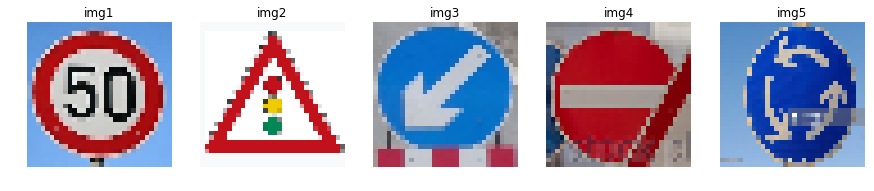

In [12]:
### Load the images and plot them here.
### Feel free to use as many code cells as needed.
import glob
images = []
test_images = []
for i, img in enumerate(glob.glob('./GTS_extra_images/*.*g')):
    image = cv2.imread(img)
    image = cv2.resize(image, (32,32))
    images.append(("img"+str(i+1), cv2.cvtColor(image, cv2.COLOR_BGR2RGB)))
    
    image = np.array(cv2.cvtColor(image, cv2.COLOR_RGB2YUV)[:,:,0])
    image = np.expand_dims((2.*image/255.)-1., axis=3).astype(np.float32)
    test_images.append(image)
    
print(len(test_images), np.asarray(test_images).shape)
test_images = preprocess(np.asarray(test_images))

compare_images(images)

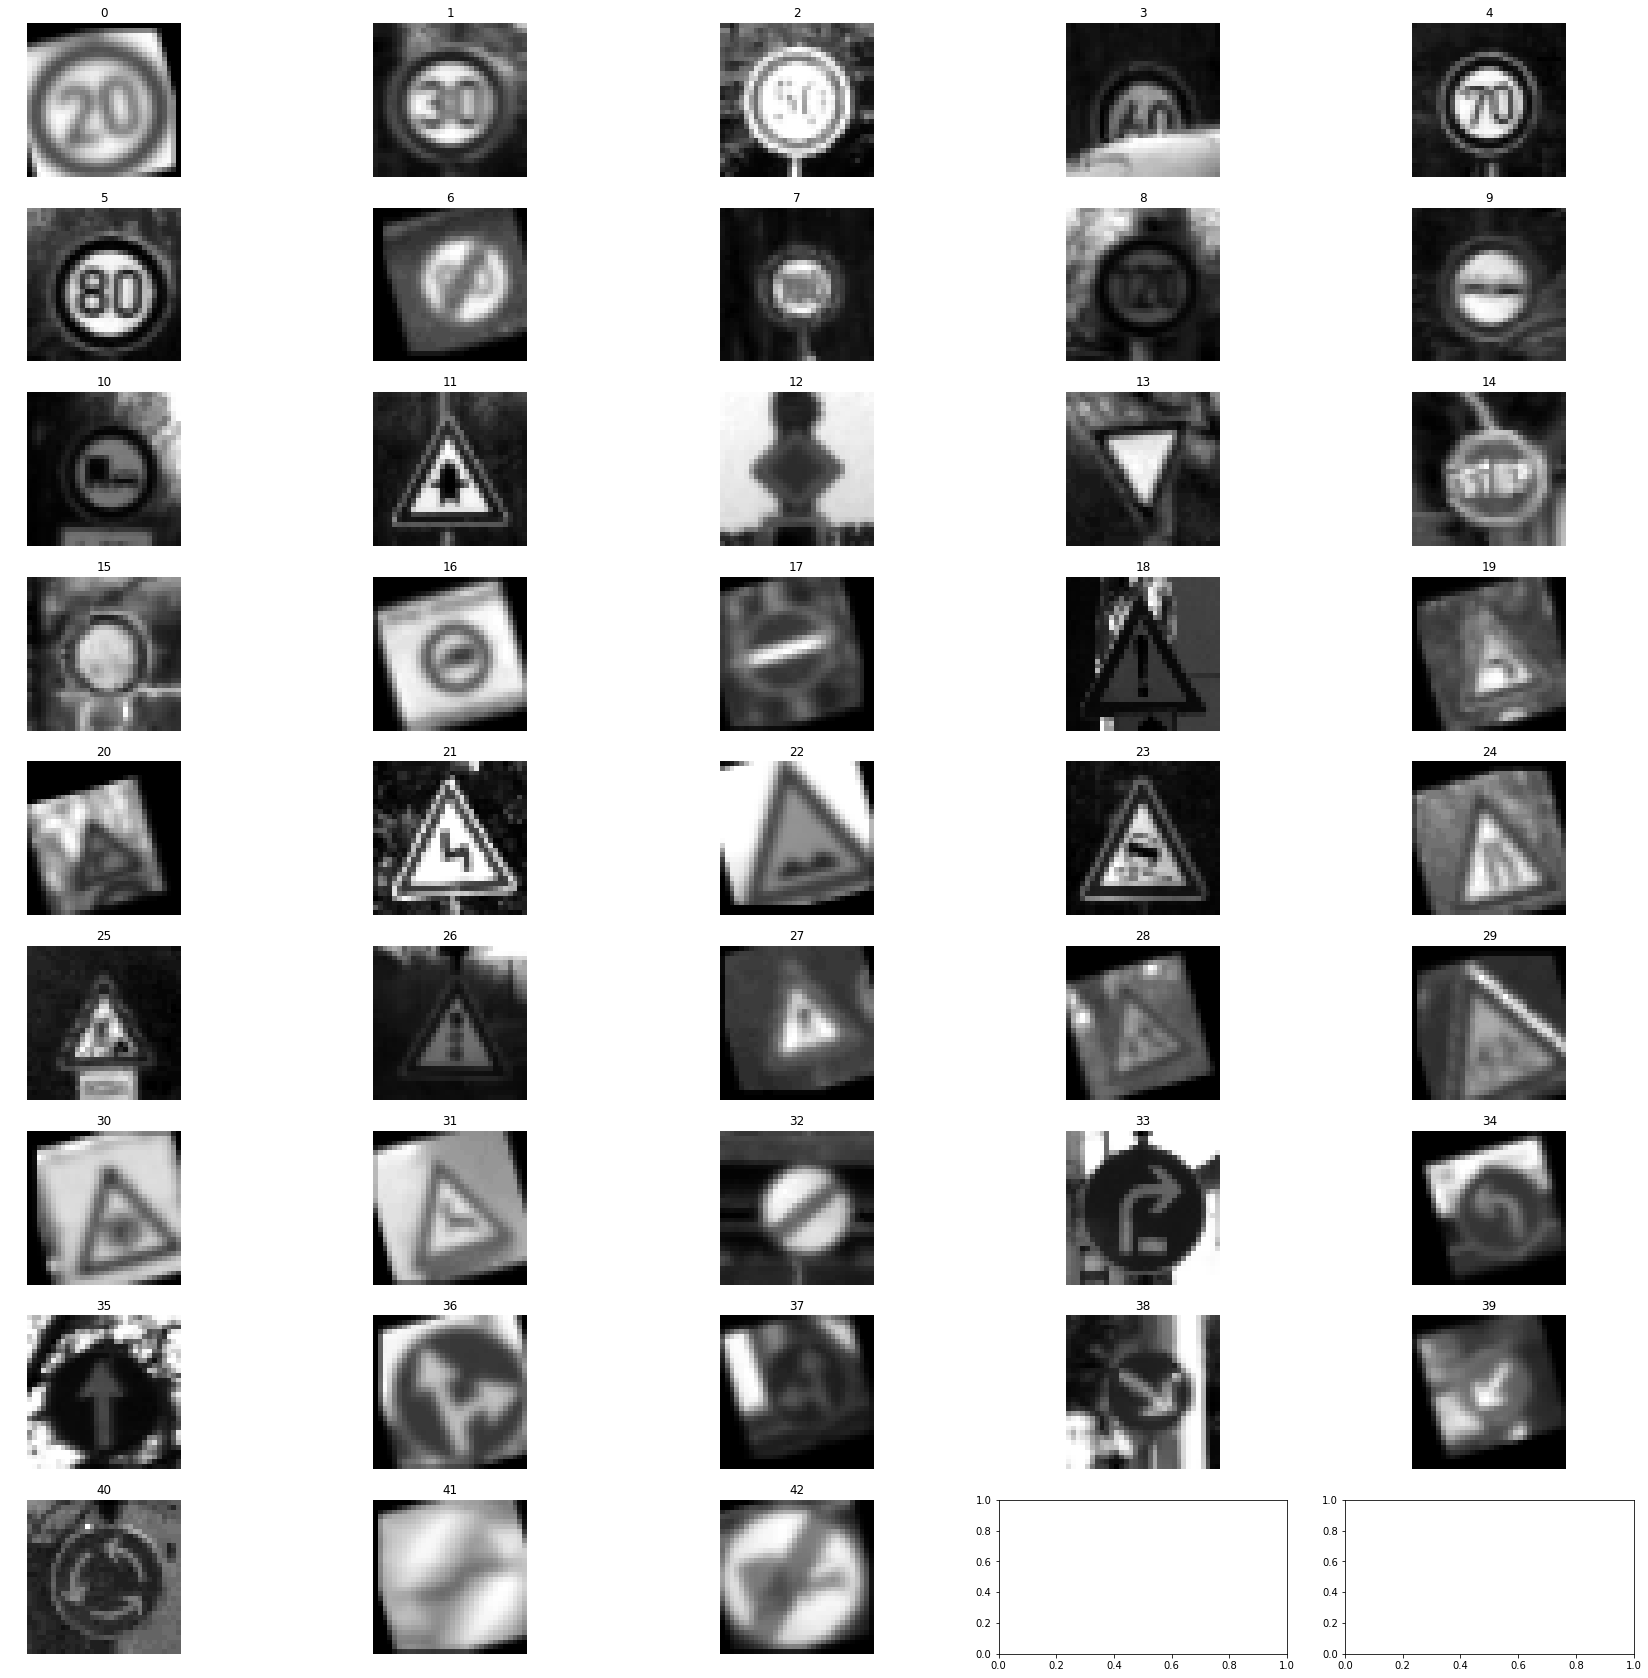

In [13]:
def compare_images2(images):
    img_count = len(images)
    fig, axs = plt.subplots(9, 5, figsize=(30, 30))

    i=0
    for title, img in images:
        axs[int(i/5)][i%5].axis('off')
        axs[int(i/5)][i%5].imshow(img.squeeze(), cmap='gray')
        axs[int(i/5)][i%5].set_title(title)
        i += 1

forshow = []
for label, img in dict(zip(y_train, X_train)).items(): # 1 image per class
    forshow.append((label, img))
    
compare_images2(forshow)

### Question 6

_Choose five candidate images of traffic signs and provide them in the report. Are there any particular qualities of the image(s) that might make classification difficult? It could be helpful to plot the images in the notebook._



**Answer:**

* Image 1 and image 5 were chosen with a watermark over them
* Image 4 has is a screenshot and not a real sign
* about 1/5 of the sign in image 1 is hidden
* Image 3 is normal

In [14]:
### Run the predictions here.
### Feel free to use as many code cells as needed.

In [15]:
labels = [2, 26, 39, 17, 40]
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    saver.restore(sess, tf.train.latest_checkpoint('.'))
    test_accuracy = evaluate(test_images, labels)
    print("Set Accuracy = {:.3f}".format(test_accuracy))

Set Accuracy = 1.000


### Question 7

_Is your model able to perform equally well on captured pictures when compared to testing on the dataset? The simplest way to do this check the accuracy of the predictions. For example, if the model predicted 1 out of 5 signs correctly, it's 20% accurate._

_**NOTE:** You could check the accuracy manually by using `signnames.csv` (same directory). This file has a mapping from the class id (0-42) to the corresponding sign name. So, you could take the class id the model outputs, lookup the name in `signnames.csv` and see if it matches the sign from the image._


**Answer:** Yes! The model has a 100% accuracy on the new images. This is obviously better than the 95.5% accuracy we saw on the provided test set, but the extra 4.5% can be attributed to this new set having a much smaller number of images. This does however show that the model generalizes really well to new images that were not in the dataset.

In [16]:
### Visualize the softmax probabilities here.
### Feel free to use as many code cells as needed.

In [17]:
softmax = tf.nn.softmax(logits)
top_k = tf.nn.top_k(softmax, k=3)
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    saver.restore(sess, tf.train.latest_checkpoint('.'))
    softmax_logits = sess.run(softmax, feed_dict={x: test_images, keep_prob: 1.0})
    top_k_choices = sess.run(top_k, feed_dict={x: test_images, keep_prob: 1.0})

### Question 8

*Use the model's softmax probabilities to visualize the **certainty** of its predictions, [`tf.nn.top_k`](https://www.tensorflow.org/versions/r0.12/api_docs/python/nn.html#top_k) could prove helpful here. Which predictions is the model certain of? Uncertain? If the model was incorrect in its initial prediction, does the correct prediction appear in the top k? (k should be 5 at most)*

`tf.nn.top_k` will return the values and indices (class ids) of the top k predictions. So if k=3, for each sign, it'll return the 3 largest probabilities (out of a possible 43) and the correspoding class ids.

Take this numpy array as an example:

```
# (5, 6) array
a = np.array([[ 0.24879643,  0.07032244,  0.12641572,  0.34763842,  0.07893497,
         0.12789202],
       [ 0.28086119,  0.27569815,  0.08594638,  0.0178669 ,  0.18063401,
         0.15899337],
       [ 0.26076848,  0.23664738,  0.08020603,  0.07001922,  0.1134371 ,
         0.23892179],
       [ 0.11943333,  0.29198961,  0.02605103,  0.26234032,  0.1351348 ,
         0.16505091],
       [ 0.09561176,  0.34396535,  0.0643941 ,  0.16240774,  0.24206137,
         0.09155967]])
```

Running it through `sess.run(tf.nn.top_k(tf.constant(a), k=3))` produces:

```
TopKV2(values=array([[ 0.34763842,  0.24879643,  0.12789202],
       [ 0.28086119,  0.27569815,  0.18063401],
       [ 0.26076848,  0.23892179,  0.23664738],
       [ 0.29198961,  0.26234032,  0.16505091],
       [ 0.34396535,  0.24206137,  0.16240774]]), indices=array([[3, 0, 5],
       [0, 1, 4],
       [0, 5, 1],
       [1, 3, 5],
       [1, 4, 3]], dtype=int32))
```

Looking just at the first row we get `[ 0.34763842,  0.24879643,  0.12789202]`, you can confirm these are the 3 largest probabilities in `a`. You'll also notice `[3, 0, 5]` are the corresponding indices.

**Answer:**

Classifier is 100% sure about 3 images, 97% sure about the fifth image and 99.999% about the remaining image. This indicates that the model is highly certain of all predictions.

2 0.999995
26 1.0
39 1.0
17 1.0
40 0.970848


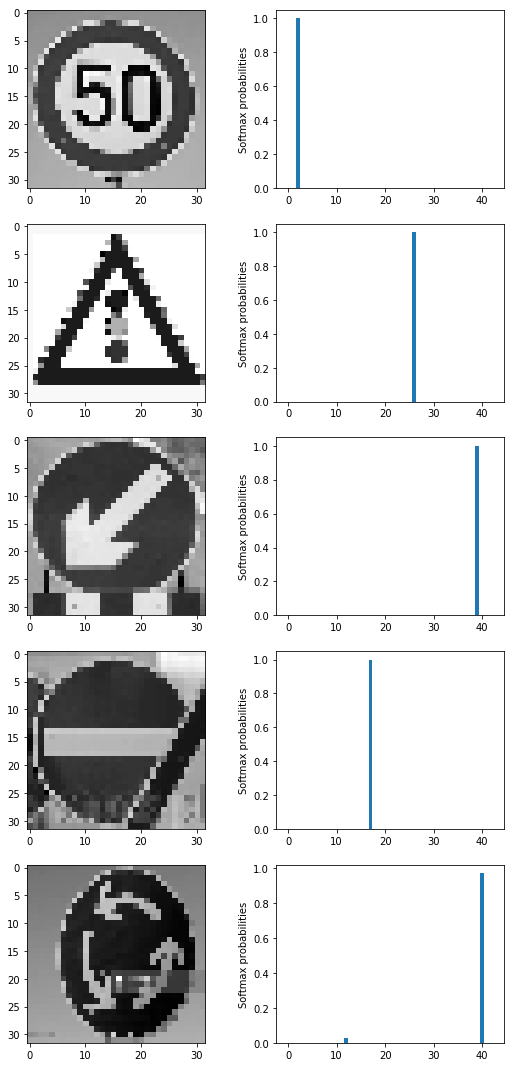

In [18]:
fig, axs = plt.subplots(5,2, figsize=(9, 19))
axs = axs.ravel()
for i in range(len(softmax_logits)*2):
    if i%2 == 0:
        axs[i].imshow(test_images[i//2].squeeze(), cmap='gray')
    else:
        sl = softmax_logits[(i-1)//2]
        max_l = max(list(sl))
        print(list(sl).index(max_l), max_l)
        axs[i].bar(np.arange(n_classes), sl) 
        axs[i].set_ylabel('Softmax probabilities')

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.